# TUTORIAL: LIMPIEZA DE DATOS CON PYTHON Y PANDAS

# 1. El problema del negocio

Una entidad bancaria contrata a una empresa de marketing encargada de contactar telefónicamente a posibles clientes para determinar si están interesados o no en adquirir un certificado de depósito a término con el banco.

¿Qué perfil tienen los clientes con mayor potencial de conversión?

#2. El set de datos

La información recolectada por la empresa de mercadeo se encuentra en un archivo CSV (`dataset_banco.csv`) con 45215 filas y 17 columnas.

Cada registro contiene 16 características (las primeras 16 columnas) y una categoría ("yes" o "no" dependiendo de si la persona está o no interesada en adquirir el producto). Las columnas son:

1. "age":  edad (numérica)
2. "job": tipo de trabajo (categórica: "admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar","self-employed", "retired", "technician", "services")
3. "marital": estado civil (categórica: "married", "divorced", "single")
4. "education": nivel educativo (categórica: "unknown", "secondary", "primary", "tertiary")
5. "default": si dejó de pagar sus obligaciones (categórica: "yes", "no")
6. "balance": saldo promedio anual en euros (numérica)
7. "housing": ¿tiene o no crédito hipotecario? (categórica: "yes", "no")
8. "loan": ¿tiene créditos de consumo? (categórica: "yes", "no")
9. "contact": medio a través del cual fue contactado (categórica: "unknown", "telephone", "cellular")
10. "day": último día del mes en el que fue contactada (numérica)
11. "month": último mes en el que fue contactada (categórica: "jan", "feb", "mar", ..., "nov", "dec")
12. "duration": duración (en segundos) del último contacto (numérica)
13. "campaign": número total de veces que fue contactada durante la campaña (numérica)
14. "pdays": número de días transcurridos después de haber sido contactado antes de la campaña actual (numérica. -1 indica que no fue contactado previamente)
15. "previous": número de veces que ha sido contactada antes de esta campaña (numérica)
16. "poutcome": resultado de la campaña de marketing anterior (categórica: "unknown", "other", "failure", "success")
17. "y": categoría ¿el cliente se suscribió a un depósito a término? (categórica: "yes", "no")

#3. Una primera mirada al dataset

In [10]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Lectura

data = pd.read_csv("dataset_banco (1).csv")

In [12]:
print(data.shape)
data.head()

(45215, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no


In [13]:
# Veamos las variables categóricas y las numéricas
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45215 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45215 non-null  int64  
 1   job        45213 non-null  object 
 2   marital    45214 non-null  object 
 3   education  45214 non-null  object 
 4   default    45215 non-null  object 
 5   balance    45213 non-null  float64
 6   housing    45215 non-null  object 
 7   loan       45215 non-null  object 
 8   contact    45215 non-null  object 
 9   day        45215 non-null  int64  
 10  month      45215 non-null  object 
 11  duration   45214 non-null  float64
 12  campaign   45215 non-null  int64  
 13  pdays      45214 non-null  float64
 14  previous   45215 non-null  int64  
 15  poutcome   45215 non-null  object 
 16  y          45215 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 5.9+ MB


#4. Limpieza

Realizaremos el proceso de limpieza teniendo en cuenta las situaciones más comunes:

1. Datos faltantes en algunas celdas
2. Columnas irrelevantes (que no responden al problema que queremos resolver)
3. Registros (filas) repetidos
4. Valores extremos (*outliers*) en el caso de las variables numéricas. Se deben analizar en detalle pues no necesariamente la solución es eliminarlos
5. Errores tipográficos en el caso de las variables categóricas

Al final de este proceso de limpieza deberíamos tener un set de datos **íntegro**, listo para la fase de Análisis Exploratorio.

## 4.1 Datos faltantes

Comenzamos a ver que los datos no están completos, pues no todas las columnas tienen la misma cantidad de registros.

El número total de registros debería ser 45.215. Sin embargo columnas como "job", "marital", "education", "balance", "duration" y "pdays".

Por ser tan pocos los datos  faltantes optaremos por eliminar las filas correspondientes:

In [14]:
count = data.count()
print(count)

data = data.dropna() #quito nulos
count = data.count()
print("###Sin nulos:")
print(count)

age          45215
job          45213
marital      45214
education    45214
default      45215
balance      45213
housing      45215
loan         45215
contact      45215
day          45215
month        45215
duration     45214
campaign     45215
pdays        45214
previous     45215
poutcome     45215
y            45215
dtype: int64
###Sin nulos:
age          45207
job          45207
marital      45207
education    45207
default      45207
balance      45207
housing      45207
loan         45207
contact      45207
day          45207
month        45207
duration     45207
campaign     45207
pdays        45207
previous     45207
poutcome     45207
y            45207
dtype: int64


##4.2 Columnas irrelevantes

Una columna irrelevante puede ser:

- **Una columna que no contiene información relevante para el problema que queremos resolver**. Por ejemplo en este caso podría ser una columna que no guarde relación con el posible perfil del cliente (deporte favorito, hobbies, comida favorita, etc.)
- **Una columna categórica pero con un sólo nivel**. Por ejemplo si en la columna "job" solo tuviésemos el nivel "unknown".
- **Una columna numérica pero con un sólo valor**. Por ejemplo si en la columna "edad" todos los vlaores fuesen iguales a 50.
- **Columnas con información redundante**. Por ejemplo si además de las columnas "month" y "day" tuviésemos la columna "month-day", resultado de combinar las dos anteriores.

Si tenemos la duda de si alguna columna puede ser relevante o no lo mejor es dejarla (y más adelante en posteriores etapas podremos darnos cuenta de si se debe preservar o no).

En este caso todas las columnas pueden resultar relevantes, pero debemos verificar que no haya columnas categóricas con un sólo nivel, o columnas numéricas con un sólo valor:

Todas las columnas categóricas tienen más de 1 subnivel. No eliminaremos ninguna.

Verifiquemos lo que ocurre con las columnas numéricas:

Todas las columnas numéricas tienen desviaciones estándar ("std") diferentes de cero, lo que indica que no tienen un único valor.

Preservaremos todas las columnas numéricas.

In [16]:
import pandas as pd

# Suponiendo que tu DataFrame se llama 'data'

# Seleccionar columnas categóricas
columnas_categoricas = data.select_dtypes(include=['object']).columns

# Iterar a través de las columnas categóricas y mostrar los subniveles
for columna in columnas_categoricas:
    print(f"Subniveles de la columna: {columna}")
    print(data[columna].value_counts())
    print("\n")

# Calcular la desviación estándar de las variables numéricas
std_variables_numericas = data.select_dtypes(include=['number']).std()

print("STANDARD DEV. DE VARIABLES NUMERICAS")
print(std_variables_numericas)

# Verificar columnas con desviación estándar de cero (indicando un único valor)
columnas_std_cero = std_variables_numericas[std_variables_numericas == 0].index
if len(columnas_std_cero) > 0:
    print(f"Columnas con desviación estándar de cero (único valor): {list(columnas_std_cero)}")
else:
    print("No hay columnas numéricas con un único valor.")

# Ejemplo: Eliminar una columna irrelevante (contact) si es necesario
# data = data.drop('contact', axis=1)


Subniveles de la columna: job
job
blue-collar       9730
management        9454
technician        7597
admin.            5166
services          4153
retired           2263
self-employed     1578
entrepreneur      1487
unemployed        1303
housemaid         1240
student            938
unknown            288
administrative       3
Management           2
MANAGEMENT           2
Self-employed        1
Services             1
Retired              1
Name: count, dtype: int64


Subniveles de la columna: marital
marital
married     27211
single      12786
divorced     5196
div.            7
Single          4
DIVORCED        3
Name: count, dtype: int64


Subniveles de la columna: education
education
secondary    23192
tertiary     13301
primary       6848
unknown       1855
SECONDARY        3
Primary          2
sec.             2
UNK              2
Secondary        1
Tertiary         1
Name: count, dtype: int64


Subniveles de la columna: default
default
no     44391
yes      816
Name: count, d

##4.3 Filas repetidas

In [17]:
# Contar las filas duplicadas
filas_duplicadas = data.duplicated()
num_filas_duplicadas = filas_duplicadas.sum()

print("Número de filas duplicadas:", num_filas_duplicadas)

data = data.drop_duplicates()


Número de filas duplicadas: 4


##4.4 *Outliers* en las variables numéricas

No siempre se deben eliminar los *outliers* porque dependiendo de la variable numérica analizada estos pueden contener información importante.


In [18]:
# Definir una función para identificar outliers usando el rango intercuartílico (IQR)
def identificar_outliers_iqr(columna):
    q1 = columna.quantile(0.25)
    q3 = columna.quantile(0.75)
    iqr = q3 - q1
    umbral_inferior = q1 - 1.5 * iqr
    umbral_superior = q3 + 1.5 * iqr
    outliers = (columna < umbral_inferior) | (columna > umbral_superior)
    return outliers

# Aplicar la función a todas las columnas numéricas del DataFrame
outliers_por_columna = data.select_dtypes(include=['float64', 'int64']).apply(identificar_outliers_iqr)

# Contar los outliers por columna
num_outliers_por_columna = outliers_por_columna.sum()

print("Número de outliers por columna:")
print(num_outliers_por_columna)


Número de outliers por columna:
age          494
balance     4733
day            0
duration    3234
campaign    3063
pdays       8253
previous    8253
dtype: int64


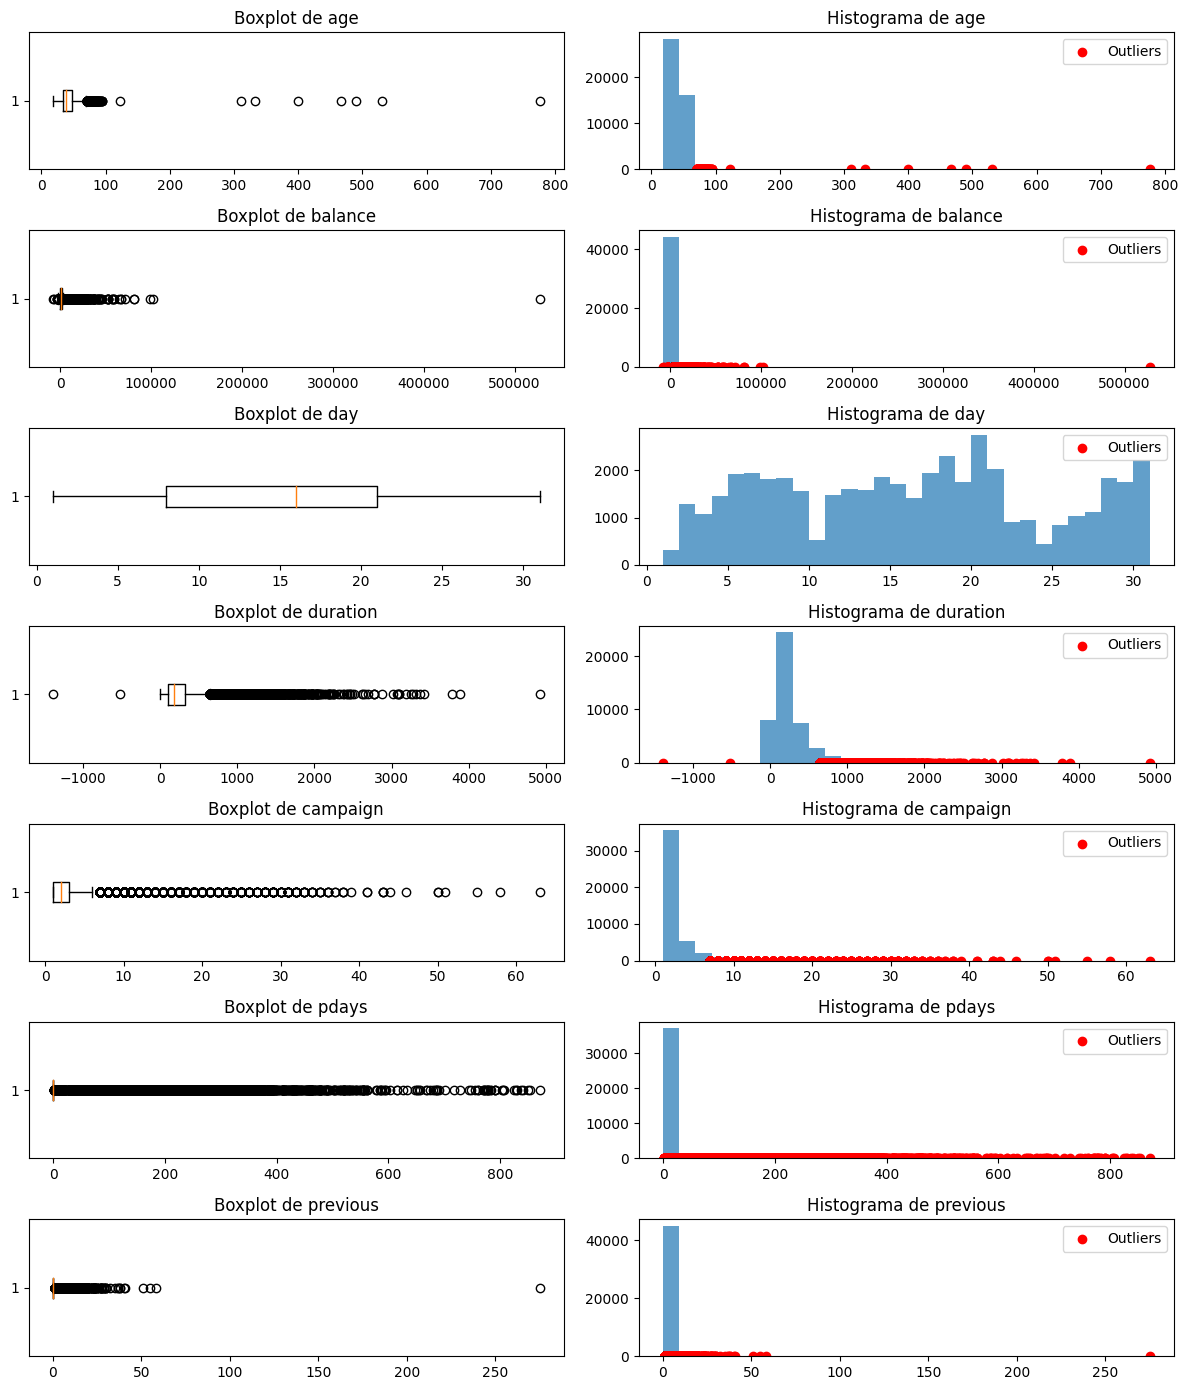

In [19]:
import matplotlib.pyplot as plt

# Seleccionar solo las columnas numéricas para visualización
data_numericas = data.select_dtypes(include=['float64', 'int64'])

# Crear subplots
fig, axs = plt.subplots(nrows=len(data_numericas.columns), ncols=2, figsize=(12, 2 * len(data_numericas.columns)))

# Iterar sobre las columnas numéricas y crear gráficos
for i, col in enumerate(data_numericas.columns):
    # Boxplot
    axs[i, 0].boxplot(data[col], vert=False)
    axs[i, 0].set_title('Boxplot de {}'.format(col))

    # Histograma
    axs[i, 1].hist(data[col], bins=30, alpha=0.7)
    axs[i, 1].set_title('Histograma de {}'.format(col))

    # Añadir marcadores para outliers
    outliers = data[col][identificar_outliers_iqr(data[col])]
    axs[i, 1].scatter(outliers, [0] * len(outliers), color='red', label='Outliers')

    # Ajustes de diseño
    axs[i, 1].legend()

plt.tight_layout()
plt.show()


In [20]:
data = data.loc[data['age'] <= 100]
data = data.loc[data['balance'] <= 200000]
data = data.loc[data['previous'] <= 50]
data = data.loc[(data['duration'] >= 0) & (data['duration'] <= 1000)]

data.loc[data['pdays'] >= 365, 'pdays'] = 365

data




,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45209,25,technician,single,secondary,no,505.0,no,yes,cellular,17,nov,386.0,2,-1.0,0,unknown,yes
45210,51,technician,married,tertiary,no,825.0,no,no,cellular,17,nov,977.0,3,-1.0,0,unknown,yes
45211,71,retired,divorced,primary,no,1729.0,no,no,cellular,17,nov,456.0,2,-1.0,0,unknown,yes
45213,57,blue-collar,married,secondary,no,668.0,no,no,telephone,17,nov,508.0,4,-1.0,0,unknown,no


##4.5 Errores tipográficos en variables categóricas

En una variable categórica pueden aparecer sub-niveles como "unknown" y "UNK" que para nosotros son equivalentes pero que para nuestro programa parecerían diferentes.

Se deben unificar estos sub-niveles

In [21]:
import pandas as pd

# Corregir valores en la columna 'marital'
data['marital'] = data['marital'].str.lower().replace({'div.': 'divorced', 'single': 'single'})

# Corregir valores en la columna 'education'
data['education'] = data['education'].str.lower().replace({'sec.': 'secondary', 'unk': 'unknown'})

# Corregir valores en la columna 'loan'
data['loan'] = data['loan'].str.lower().replace({'no ': 'no', 'yes': 'yes', 'yes ': 'yes'})

# Corregir valores en la columna 'poutcome'
data['poutcome'] = data['poutcome'].str.lower().replace({'unk': 'unknown', 'success': 'successful'})

#Corregir job
data['job'] = data['job'].str.lower().replace({'admin.': 'administrative', 'MANAGEMENT': 'Management', 'management': 'Management', 'services' : 'Services', })

# Corregir contact
data['contact'] = data['contact'].str.lower().replace({'cellular': 'phone', 'telephone': 'phone', 'mobile': 'phone'})


# Visualizar los subniveles corregidos
for columna in data.select_dtypes(include=['object']).columns:
    print("Subniveles de la columna:", columna)
    print(data[columna].value_counts())
    print("\n")

# Guardar el DataFrame corregido


Subniveles de la columna: job
job
blue-collar       9490
Management        9224
technician        7429
administrative    5069
Services          4051
retired           2202
self-employed     1532
entrepreneur      1454
unemployed        1270
housemaid         1205
student            922
unknown            285
Name: count, dtype: int64


Subniveles de la columna: marital
marital
married     26612
single      12457
divorced     5064
Name: count, dtype: int64


Subniveles de la columna: education
education
secondary    22658
tertiary     12966
primary       6692
unknown       1817
Name: count, dtype: int64


Subniveles de la columna: default
default
no     43327
yes      806
Name: count, dtype: int64


Subniveles de la columna: housing
housing
yes    24503
no     19630
Name: count, dtype: int64


Subniveles de la columna: loan
loan
no     37058
yes     7075
Name: count, dtype: int64


Subniveles de la columna: contact
contact
phone      31415
unknown    12718
Name: count, dtype: int64


Su

## Conclusiones

In [22]:
data.to_csv('tu_archivo_corregido.csv', index=False)
